##**Tugas MInggu 8 Kelompok 2**
___

Anggota Kelompok:
- Windi Pangesti    (M0501241022)
- Nabila Syukri     (M0501241086)
____

Soal:


1.  Buatlah simulasi deret waktu (parameter yang digunakan bebas, tetapi berbeda dengan contoh yag sudah digunakan di atas) menggunakan **seed 2508**) Lakukan pendugaan parameter menggunakan metode Kuadrat Terkecil dan Kemungkinan Maksimum

 **Kelompok 2: ARIMA (2,0,1) dan ARIMA (1,1,1)**

2.  Ulangi langkah no.1 sebanyak 30 ulangan. Hitunglah bias dan ragam dari penduga parameter menggunakan metode Kuadrat Terkecil dan Kemungkinan Maksimum yang diperoleh dari 30 ulangan tersebut. Dan buatlah boxplot untuk memvisualisasikan bias dan ragam tersebut.
 Interpretasikan boxpot yang diperoleh



In [122]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [123]:
import warnings
warnings.filterwarnings("ignore")
#Jalankan syntax ini cukup satu kali, jangan berulang
#%load_ext rpy2.ipython

In [124]:
!pip install rpy2

In [125]:
%%R
install.packages('TSA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/TSA_1.3.1.tar.gz'
Content type 'application/x-gzip' length 207505 bytes (202 KB)
downloaded 202 KB


The downloaded source packages are in
	‘/tmp/RtmpwFHEbb/downloaded_packages’


# ARIMA (2,0,1)

In [126]:
%%R
 set.seed(2508)
 arma21=arima.sim(list(order = c(2,0,1), ar = c(1.2,-0.70), ma=0.3), n = 100)

## Metode Kuadrat Terkecil

In [127]:
%%R
model21=(arima(arma21, order=c(2,0,1),method='CSS'))
model21


Call:
arima(x = arma21, order = c(2, 0, 1), method = "CSS")

Coefficients:
         ar1      ar2     ma1  intercept
      1.1286  -0.6317  0.3995     0.5068
s.e.  0.0951   0.0891  0.1179     0.3008

sigma^2 estimated as 1.178:  part log likelihood = -150.07


Data simulasi ARMA (2,0,1), nilai parameter aslinya untuk AR adalah 1.2 dan -0.7 dengan nilai penduga kuadrat terkecilnya adalah 1.1286 dan -0.6317, untuk MA nilai parameter aslinya 0.3 sedangkan untuk hasil penduga kuadrat terkecilnya bernilai 0.3995

In [128]:
%%R
set.seed(2508)

# Parameter asli
true_ar <- c(1.2, -0.7)
true_ma <- 0.3

# Inisialisasi matriks hasil estimasi
estimasi <- matrix(NA, nrow = 30, ncol = 3)
colnames(estimasi) <- c("AR1", "AR2", "MA1")

# Simulasi dan estimasi sebanyak 30 kali
for (i in 1:30) {
  arma21 <- arima.sim(list(order = c(2,0,1), ar = true_ar, ma = true_ma), n = 100)
  model21 <- arima(arma21, order = c(2,0,1), method = "CSS")
  estimasi[i, ] <- model21$coef[c("ar1", "ar2", "ma1")]
}

# Konversi ke data.frame
estimasi_df <- as.data.frame(estimasi)

#  rata-rata estimasi
rata2_estimasi <- colMeans(estimasi_df)

#  bias = rata2 estimasi - nilai sebenarnya
bias <- rata2_estimasi - c(true_ar, true_ma)

#  ragam (variansi) dari estimasi
ragam <- apply(estimasi_df, 2, var)


print("Bias:")
print(bias)

print("Ragam:")
print(ragam)


[1] "Bias:"
         AR1          AR2          MA1 
-0.007190466  0.009546710  0.025313356 
[1] "Ragam:"
        AR1         AR2         MA1 
0.006621670 0.004951369 0.013484677 


## Metode Kemungkinan Maksimum

In [129]:
%%R
set.seed(2508)
print(arima(arma21, order=c(2,0,1),method='ML'))


Call:
arima(x = arma21, order = c(2, 0, 1), method = "ML")

Coefficients:
         ar1      ar2     ma1  intercept
      1.3029  -0.7604  0.3294    -0.0401
s.e.  0.0764   0.0754  0.0982     0.2746

sigma^2 estimated as 0.8859:  log likelihood = -137.57,  aic = 285.14


deret ARIMA (2,0,1) yang dibangkitkan memiliki nilai parmeter asli phi1 = 1.2 dan phi2 = -0.7 dengan hasil penduga parameter metode kemungkinan maksimum adalah 1.3029 dan -0.7604 kemudian theta = 0.3 dengan penduga nya 0.3294

In [130]:
%%R
set.seed(2508)

# Parameter sebenarnya
true_ar <- c(1.2, -0.7)
true_ma <- 0.3

# Inisialisasi hasil
estimasi_ml <- matrix(NA, nrow = 30, ncol = 3)
colnames(estimasi_ml) <- c("AR1", "AR2", "MA1")

# Simulasi 30 kali dengan metode Maximum Likelihood
for (i in 1:30) {
  sim_data <- arima.sim(list(order = c(2,0,1), ar = true_ar, ma = true_ma), n = 100)
  model_ml <- arima(sim_data, order = c(2,0,1), method = "ML")
  estimasi_ml[i, ] <- model_ml$coef[c("ar1", "ar2", "ma1")]
}

# Konversi ke data frame
estimasi_ml_df <- as.data.frame(estimasi_ml)

# Hitung rata-rata, bias, dan ragam
rata2_ml <- colMeans(estimasi_ml_df)
bias_ml <- rata2_ml - c(true_ar, true_ma)
ragam_ml <- apply(estimasi_ml_df, 2, var)

# Tampilkan hasil

print("Bias (ML):")
print(bias_ml)

print("Ragam (ML):")
print(ragam_ml)


[1] "Bias (ML):"
        AR1         AR2         MA1 
-0.01029951  0.01320347  0.03186834 
[1] "Ragam (ML):"
        AR1         AR2         MA1 
0.007340623 0.005039793 0.014910049 


In addition: Warning messages:
1: In arima(sim_data, order = c(2, 0, 1), method = "ML") :
  possible convergence problem: optim gave code = 1
2: In log(s2) : NaNs produced


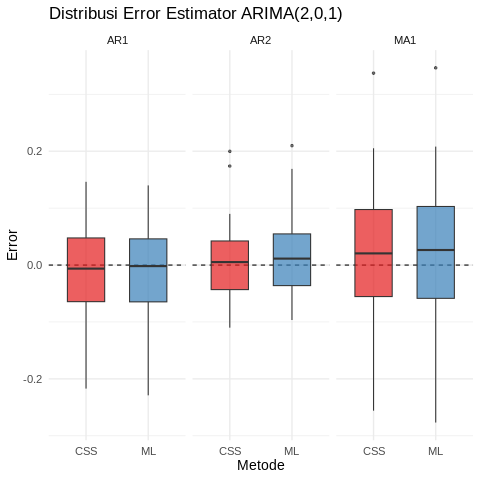

In [131]:
%%R
library(ggplot2)
library(tidyr)
library(dplyr)

# Pastikan kolomnya sesuai urutan AR1, AR2, MA1
colnames(estimasi_df) <- c("AR1", "AR2", "MA1")
colnames(estimasi_ml_df) <- c("AR1", "AR2", "MA1")

# Tambahkan label metode
estimasi_arima21_css_df <- as.data.frame(estimasi_df)
estimasi_arima21_css_df$Method <- "CSS"

estimasi_arima21_ml_df <- as.data.frame(estimasi_ml_df)
estimasi_arima21_ml_df$Method <- "ML"

# Gabung dan transform jadi long format
est_all <- bind_rows(estimasi_arima21_css_df, estimasi_arima21_ml_df) %>%
  pivot_longer(cols = c("AR1", "AR2", "MA1"),
               names_to = "Parameter",
               values_to = "Estimate") %>%
  mutate(True = case_when(
    Parameter == "AR1" ~ 1.2,
    Parameter == "AR2" ~ -0.7,
    Parameter == "MA1" ~ 0.3
  ),
  Error = Estimate - True)

# Plot boxplot
ggplot(est_all, aes(x = Method, y = Error, fill = Method)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_boxplot(alpha = 0.7, width = 0.6, outlier.size = 1) +
  facet_wrap(~ Parameter) +
  labs(
    title    = "Distribusi Error Estimator ARIMA(2,0,1)",
    x        = "Metode",
    y        = "Error"
  ) +
  theme_minimal(base_size = 14) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "none")


gambar di atas merupakan visualisasi boxplot perbandingan metode Kuadrat Terkecil (CSS) dan Kemungkinan Maksimum (ML) terhadap  bias dan ragam pendugaan.

- Parameter AR 1
Median error dari kedua metode mendekati 0, menunjukkan bahwa estimasi keduanya tidak bias atau memilikibias yang sangat kecil terhadap parameter AR 1.  
Untuk varians metode ML lebih besar dibanding CSS karena wishkernya lebih panjang dan box lebih lebar ini menunjukkan bahwa metode ML menghasilkan estimasi AR 1 yang lebih bervariasi dibandingkan metode CSS.

- Parameter AR 2
Median error dari metode CSS sangat mendekati 0 sehingga bias estimasi lebih kecil dibandingkan ML.
Untuk varians, metode ML lebih luas untuk AR 2 sehingga lebih bervariasi dalam menduga parameter AR 2

- Parameter MA 1
Median dari kedua metode baik CSS maupun ML mendekati 0 dan di atas 0 artinya keduanya cenderung overestimate dari nilai sebenarnya dari MA 1.
Untuk varians, kedua metode memiliki kotak yang lebar sehingga parameter MA diestimasi tidak begitu konsisten pada kedua metode karena ragam yang besar.

hal ini sejalan dengan hasil perhitungan yang menunjukkan untuk parameter MA 1 memiliki ragam yang lebih besar untuk kedua metode

- Kesimpulan : CSS cenderung lebih stabil dalam memberikan estimasi (ragam kecil) terutama pada parameter AR

# ARIMA (1,1,1)

In [132]:
%%R
 set.seed(2508)
 arima111 <- arima.sim(list(order = c(1,1,1), ar = 0.6, ma = 0.3), n = 100)

## Metode Kuadrat Terkecil

In [133]:
%%R
print(arima(arima111, order=c(1,1,1),method='CSS'))


Call:
arima(x = arima111, order = c(1, 1, 1), method = "CSS")

Coefficients:
         ar1     ma1
      0.5951  0.4747
s.e.  0.0995  0.1176

sigma^2 estimated as 1.271:  part log likelihood = -153.88


parameter asli phi = 0.6 dan theta = 0.3 sedangkan hasil penduga parameter MKT untuk phi = 0.5951 dan theta adalah 0.4747

In [134]:
%%R
set.seed(2508)

# Jumlah simulasi
n_simulasi <- 30

# Simulasi dan estimasi parameter ARIMA(1,1,1) sebanyak 30 kali
estimasi_arima_111 <- matrix(NA, nrow = n_simulasi, ncol = 2)
colnames(estimasi_arima_111) <- c("AR1", "MA1")

# Nilai sebenarnya
true_ar <- 0.6
true_ma <- 0.3

# Melakukan 30 simulasi dan estimasi
for (i in 1:n_simulasi) {
  arima111 <- arima.sim(list(order = c(1,1,1), ar = true_ar, ma = true_ma), n = 100)
  model111_css <- arima(arima111, order = c(1,1,1), method = "CSS")
  estimasi_arima_111[i, ] <- model111_css$coef[c("ar1", "ma1")]
}

# Menghitung bias
bias_arima_111 <- colMeans(estimasi_arima_111) - c(true_ar, true_ma)

# Menghitung ragam (variansi) dari estimasi AR1 dan MA1
ragam_arima_111 <- apply(estimasi_arima_111, 2, var)

# Menampilkan hasil bias dan ragam
print("Bias ARIMA(1,1,1) CSS:")
print(bias_arima_111)

print("Ragam ARIMA(1,1,1) CSS:")
print(ragam_arima_111)


[1] "Bias ARIMA(1,1,1) CSS:"
        AR1         MA1 
-0.02134334  0.05260804 
[1] "Ragam ARIMA(1,1,1) CSS:"
       AR1        MA1 
0.01582747 0.01704061 


## Metode Kemungkinan Maksimum

In [135]:
%%R
set.seed(2508)
print(arima(arima111, order=c(1,1,1),method='ML'))


Call:
arima(x = arima111, order = c(1, 1, 1), method = "ML")

Coefficients:
         ar1     ma1
      0.6082  0.3402
s.e.  0.0964  0.1098

sigma^2 estimated as 0.9708:  log likelihood = -140.9,  aic = 287.79


parameter asli phi = 0.6 dan theta = 0.3 sedangkan hasil penduga parameter ML untuk phi 0.6082 dan theta adalah 0.3402

In [136]:
%%R
set.seed(2508)

# Jumlah simulasi
n_simulasi <- 30

# Simpan hasil estimasi
estimasi_arima_111_ml <- matrix(NA, nrow = n_simulasi, ncol = 2)
colnames(estimasi_arima_111_ml) <- c("AR1", "MA1")

# Nilai sebenarnya
true_ar <- 0.6
true_ma <- 0.3

# Simulasi 30 kali
for (i in 1:n_simulasi) {
  arima111 <- arima.sim(list(order = c(1,1,1), ar = true_ar, ma = true_ma), n = 100)
  model111_ml <- arima(arima111, order = c(1,1,1), method = "ML")

  estimasi_arima_111_ml[i, ] <- model111_ml$coef[c("ar1", "ma1")]
}

# Menghitung bias
bias_ml <- colMeans(estimasi_arima_111_ml) - c(true_ar, true_ma)

# Menghitung ragam (variansi estimasi)
ragam_ml <- apply(estimasi_arima_111_ml, 2, var)

# Tampilkan hasil
print("Bias ARIMA(1,1,1) ML:")
print(bias_ml)

print("Ragam ARIMA(1,1,1) ML:")
print(ragam_ml)


[1] "Bias ARIMA(1,1,1) ML:"
        AR1         MA1 
-0.01615041  0.04849841 
[1] "Ragam ARIMA(1,1,1) ML:"
       AR1        MA1 
0.01353196 0.01697645 


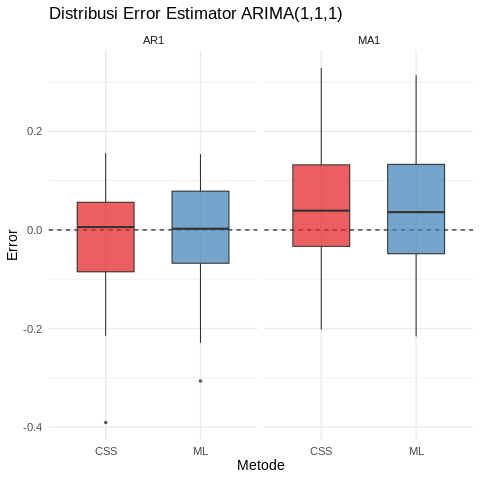

In [137]:
%%R
library(ggplot2)
library(tidyr)
library(dplyr)

estimasi_css_df <- as.data.frame(estimasi_arima_111)
estimasi_css_df$Method <- "CSS"

estimasi_ml_df  <- as.data.frame(estimasi_arima_111_ml)
estimasi_ml_df$Method  <- "ML"

#gabungan
est_all <- bind_rows(estimasi_css_df, estimasi_ml_df) %>%
  pivot_longer(cols = c("AR1","MA1"),
               names_to  = "Parameter",
               values_to = "Estimate") %>%
  mutate(True = if_else(Parameter=="AR1", 0.6, 0.3),
         Error = Estimate - True)

# plot
ggplot(est_all, aes(x = Method, y = Error, fill = Method)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_boxplot(alpha = 0.7, width = 0.6, outlier.size = 1) +
  facet_wrap(~ Parameter) +
  labs(
    title    = "Distribusi Error Estimator ARIMA(1,1,1)",
    x        = "Metode",
    y        = "Error"
  ) +
  theme_minimal(base_size = 14) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "none")


Boxplot di atas merupakan perbandingan distribusi error parameter MKT dan ML untuk model ARIMA (1,1,1)
- AR 1
kedua metode memiliki median eror  sangat dekat garis putus-putus 0, artinya bias kecil untuk kedua metode tersebut.
Untuk varians, metode ML sedikit lebih lebar sehingga ragam lebih besar untuk estimasi parameter AR 1 dibanding CSS

- MA 1
Median eror  kedua metode berada di atas 0 artinya kedua metode cenderung overestimate nilai sebenarnya untuk estimasi parameter MA 1. Untuk varians, ML dan CSS memiliki lebar kotak yang hampir sama, mengindikasikan konsistensi yng sebanding, namun ragamnya cukup besar yang menunjukkan bahwa penaan parameter MA 1 lebih bervariasi.

- Kesimpulan
Keda metode memiliki bias kecil dalam estimasi AR 1 tetapi ML sedikit lebih bervariasi